In [1]:
# Import library
import requests # request HTTP
from bs4 import BeautifulSoup # Mengambil test dari html
import pandas as pd 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/var/folders/rh/454377xn11sbbfl82427zkyc0000gn/T/ipykernel_50823/3171379314.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# warning error 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
url = 'https://www.detik.com/search/searchall?query=anies+baswedan&siteid=2'

# get request
response = requests.get(url)

In [4]:
# status code
response.status_code  # 200 berarti OK, 404 berarti error

200

In [5]:
soup = BeautifulSoup(response.content, "html.parser")

In [6]:
# Mencari judul judul yang berkaitan dengan tag Anies B
tag_for_titles = soup.find_all('h2','title')
tag_for_titles

[<h2 class="title">Kala Rocky Gerung Ingin Jadi Jaksa Agung dan Ramalkan Jokowi-Prabowo Retak</h2>,
 <h2 class="title">Argumentasi Tim Ganjar yang Ingin Dugaan Pelanggaran TSM Tetap Diadili MK</h2>,
 <h2 class="title">Kata Gerindra hingga PKB soal Puan Bilang Tak Ada Instruksi Hak Angket</h2>,
 <h2 class="title">PKB Tunggu Sikap Resmi PDIP Usai Puan Bilang Tak Ada Instruksi Angket</h2>,
 <h2 class="title">Habiburokhman Apresiasi Puan soal Tak Ada Instruksi Hak Angket: Menyejukkan</h2>,
 <h2 class="title">KPU Vs Tim AMIN soal Gibran Disoal Andai Anies Menang Pilpres</h2>,
 <h2 class="title">Tanggapan Airlanga Diminta Kubu AMIN Jadi Saksi Sengketa Pilpres di MK</h2>,
 <h2 class="title">Respons Airlangga Diminta Kubu AMIN Jadi Saksi Sengketa Pilpres di MK</h2>,
 <h2 class="title">Tim Hukum 02 Nilai Dugaan TSM di Pilpres Harusnya Tak Diadili MK</h2>,
 <h2 class="title">Respons Menohok KPU ke Anies, Gibran Tak Disoal Andai AMIN Menang</h2>]

In [7]:
# Extraxt judul text
titles = [i.text for i in tag_for_titles]
titles

['Kala Rocky Gerung Ingin Jadi Jaksa Agung dan Ramalkan Jokowi-Prabowo Retak',
 'Argumentasi Tim Ganjar yang Ingin Dugaan Pelanggaran TSM Tetap Diadili MK',
 'Kata Gerindra hingga PKB soal Puan Bilang Tak Ada Instruksi Hak Angket',
 'PKB Tunggu Sikap Resmi PDIP Usai Puan Bilang Tak Ada Instruksi Angket',
 'Habiburokhman Apresiasi Puan soal Tak Ada Instruksi Hak Angket: Menyejukkan',
 'KPU Vs Tim AMIN soal Gibran Disoal Andai Anies Menang Pilpres',
 'Tanggapan Airlanga Diminta Kubu AMIN Jadi Saksi Sengketa Pilpres di MK',
 'Respons Airlangga Diminta Kubu AMIN Jadi Saksi Sengketa Pilpres di MK',
 'Tim Hukum 02 Nilai Dugaan TSM di Pilpres Harusnya Tak Diadili MK',
 'Respons Menohok KPU ke Anies, Gibran Tak Disoal Andai AMIN Menang']

In [8]:
from textblob import TextBlob

In [9]:
def textblob_score(text):
    blob_object = TextBlob(text)
    text_en = blob_object.translate(from_lang='id', to='en')
    score = text_en.sentiment.polarity
    return score

In [10]:
# test sample
sample_text = 'TPN Bantah Mahfud Live TikTok Terispirasi Anies'
textblob_score(sample_text)

0.13636363636363635

In [11]:
# Membuat fungsi untuk scrapping data dan mendapatkan skor polaritas
def scrape_news(start_date="2024-01-01", keyword="pilpres 2024"):
    start_date = pd.Timestamp(start_date).tz_localize(None) 
    keyword_url = keyword.replace(' ','+')
    news = []

    # inisiasi nomor halaman
    x=1
    #loop untuk scrappig halaman sampai start_date tercapai
    while True:
        #membangun URP untuk halaman terbaru
        url_detik = f'https://www.detik.com/search/searchall?query={keyword_url}&siteid={x}'
        print(f'scrape page:{x}')
        #membuat request ke URL dan parse content
        page = requests.get(url_detik)
        soup = BeautifulSoup(page.content, "html.parser")
        #menemukan semua artikel dalam halaman
        articles = soup.find_all('article')
        for i in articles:
            #mengambil tanggal, URL, dan judul artikel
            date = i.find('span','date').text.split(',')[1].replace('Des','Dec')
            date = pd.to_datetime(date).tz_localize(None) 
            url = i.find('a').get('href')
            title = i.find('h2','title').text
            #menghitung skor sentimen menggunakan fungsi textblob_score
            polarity = textblob_score(title)
            #menghentikan loop jika start_date lebih besar daripada tanggal artikel saat ini
            #if start_date>date:
                #break
            news.append({
                'keyword':keyword,
                'platform':'detikcom',
                'date':date,
                'url':url,
                'title':title,
                'score':polarity
            })
        # Break the main loop
        if (x==20):
            break
        x += 1 #pindah ke halaman selanjutnya
    return news

No urut 01

In [13]:
Keyword = 'anies baswedan'
start = "2023-11-28" # awal kampanye
anies_news = scrape_news(start_date=start, keyword=Keyword)
anies_news

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20


[{'keyword': 'anies baswedan',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 09:17:00'),
  'url': 'https://www.detik.com/bali/nusra/d-7270197/kala-rocky-gerung-ingin-jadi-jaksa-agung-dan-ramalkan-jokowi-prabowo-retak',
  'title': 'Kala Rocky Gerung Ingin Jadi Jaksa Agung dan Ramalkan Jokowi-Prabowo Retak',
  'score': 0.125},
 {'keyword': 'anies baswedan',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 07:46:00'),
  'url': 'https://news.detik.com/pemilu/d-7270144/argumentasi-tim-ganjar-yang-ingin-dugaan-pelanggaran-tsm-tetap-diadili-mk',
  'title': 'Argumentasi Tim Ganjar yang Ingin Dugaan Pelanggaran TSM Tetap Diadili MK',
  'score': -0.1},
 {'keyword': 'anies baswedan',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-30 23:05:00'),
  'url': 'https://news.detik.com/pemilu/d-7269890/kata-gerindra-hingga-pkb-soal-puan-bilang-tak-ada-instruksi-hak-angket',
  'title': 'Kata Gerindra hingga PKB soal Puan Bilang Tak Ada Instruksi Hak Angket',
  'score': 0.0},
 {

In [14]:
df_anies = pd.DataFrame(anies_news)
df_anies.head()

,keyword,platform,date,url,title,score
0,anies baswedan,detikcom,2024-03-31 09:17:00,https://www.detik.com/bali/nusra/d-7270197/kal...,Kala Rocky Gerung Ingin Jadi Jaksa Agung dan R...,0.125
1,anies baswedan,detikcom,2024-03-31 07:46:00,https://news.detik.com/pemilu/d-7270144/argume...,Argumentasi Tim Ganjar yang Ingin Dugaan Pelan...,-0.100
2,anies baswedan,detikcom,2024-03-30 23:05:00,https://news.detik.com/pemilu/d-7269890/kata-g...,Kata Gerindra hingga PKB soal Puan Bilang Tak ...,0.000
3,anies baswedan,detikcom,2024-03-30 07:45:00,https://news.detik.com/pemilu/d-7268846/pkb-tu...,PKB Tunggu Sikap Resmi PDIP Usai Puan Bilang T...,0.000
4,anies baswedan,detikcom,2024-03-30 06:25:00,https://news.detik.com/pemilu/d-7268819/habibu...,Habiburokhman Apresiasi Puan soal Tak Ada Inst...,0.000


no 2

In [15]:
Keyword = 'prabowo subianto'
start = "2023-11-28" # awal kampanye
prabowo_news = scrape_news(start_date=start, keyword=Keyword)
prabowo_news

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20


[{'keyword': 'prabowo subianto',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 09:17:00'),
  'url': 'https://www.detik.com/bali/nusra/d-7270197/kala-rocky-gerung-ingin-jadi-jaksa-agung-dan-ramalkan-jokowi-prabowo-retak',
  'title': 'Kala Rocky Gerung Ingin Jadi Jaksa Agung dan Ramalkan Jokowi-Prabowo Retak',
  'score': 0.125},
 {'keyword': 'prabowo subianto',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 08:50:00'),
  'url': 'https://news.detik.com/pemilu/d-7270178/demokrat-sambut-baik-rencana-pertemuan-prabowo-dan-megawati',
  'title': 'Demokrat Sambut Baik Rencana Pertemuan Prabowo dan Megawati',
  'score': 0.0},
 {'keyword': 'prabowo subianto',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 07:46:00'),
  'url': 'https://news.detik.com/pemilu/d-7270144/argumentasi-tim-ganjar-yang-ingin-dugaan-pelanggaran-tsm-tetap-diadili-mk',
  'title': 'Argumentasi Tim Ganjar yang Ingin Dugaan Pelanggaran TSM Tetap Diadili MK',
  'score': -0.1},
 {'keyword': 'prab

In [16]:
df_prabowo = pd.DataFrame(prabowo_news)
df_prabowo.head()

,keyword,platform,date,url,title,score
0,prabowo subianto,detikcom,2024-03-31 09:17:00,https://www.detik.com/bali/nusra/d-7270197/kal...,Kala Rocky Gerung Ingin Jadi Jaksa Agung dan R...,0.125
1,prabowo subianto,detikcom,2024-03-31 08:50:00,https://news.detik.com/pemilu/d-7270178/demokr...,Demokrat Sambut Baik Rencana Pertemuan Prabowo...,0.000
2,prabowo subianto,detikcom,2024-03-31 07:46:00,https://news.detik.com/pemilu/d-7270144/argume...,Argumentasi Tim Ganjar yang Ingin Dugaan Pelan...,-0.100
3,prabowo subianto,detikcom,2024-03-30 21:46:00,https://www.detik.com/bali/nusra/d-7269807/roc...,Rocky Gerung 'Ingin' Jadi Jaksa Agung di Kabin...,0.050
4,prabowo subianto,detikcom,2024-03-30 19:57:00,https://www.detik.com/bali/nusra/d-7269691/roc...,Rocky Gerung Prediksi Hubungan Jokowi-Prabowo ...,0.000


In [17]:
Keyword = 'ganjar pranowo'
start = "2023-11-28" # awal kampanye
ganjar_news = scrape_news(start_date=start, keyword=Keyword)
ganjar_news

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20


[{'keyword': 'ganjar pranowo',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 09:17:00'),
  'url': 'https://www.detik.com/bali/nusra/d-7270197/kala-rocky-gerung-ingin-jadi-jaksa-agung-dan-ramalkan-jokowi-prabowo-retak',
  'title': 'Kala Rocky Gerung Ingin Jadi Jaksa Agung dan Ramalkan Jokowi-Prabowo Retak',
  'score': 0.125},
 {'keyword': 'ganjar pranowo',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-31 07:46:00'),
  'url': 'https://news.detik.com/pemilu/d-7270144/argumentasi-tim-ganjar-yang-ingin-dugaan-pelanggaran-tsm-tetap-diadili-mk',
  'title': 'Argumentasi Tim Ganjar yang Ingin Dugaan Pelanggaran TSM Tetap Diadili MK',
  'score': -0.1},
 {'keyword': 'ganjar pranowo',
  'platform': 'detikcom',
  'date': Timestamp('2024-03-30 23:05:00'),
  'url': 'https://news.detik.com/pemilu/d-7269890/kata-gerindra-hingga-pkb-soal-puan-bilang-tak-ada-instruksi-hak-angket',
  'title': 'Kata Gerindra hingga PKB soal Puan Bilang Tak Ada Instruksi Hak Angket',
  'score': 0.0},
 {

In [18]:
df_ganjar = pd.DataFrame(ganjar_news)
df_ganjar.head()

,keyword,platform,date,url,title,score
0,ganjar pranowo,detikcom,2024-03-31 09:17:00,https://www.detik.com/bali/nusra/d-7270197/kal...,Kala Rocky Gerung Ingin Jadi Jaksa Agung dan R...,0.125
1,ganjar pranowo,detikcom,2024-03-31 07:46:00,https://news.detik.com/pemilu/d-7270144/argume...,Argumentasi Tim Ganjar yang Ingin Dugaan Pelan...,-0.100
2,ganjar pranowo,detikcom,2024-03-30 23:05:00,https://news.detik.com/pemilu/d-7269890/kata-g...,Kata Gerindra hingga PKB soal Puan Bilang Tak ...,0.000
3,ganjar pranowo,detikcom,2024-03-30 10:28:00,https://news.detik.com/berita/d-7268966/ganjar...,Ganjar Jadi Warga Sleman Usai Tak Jabat Gubern...,0.000
4,ganjar pranowo,detikcom,2024-03-30 07:45:00,https://news.detik.com/pemilu/d-7268846/pkb-tu...,PKB Tunggu Sikap Resmi PDIP Usai Puan Bilang T...,0.000


In [19]:
def content_info(df): 
    # membuat copy dataframe untuk menghindari memodifikasi yg asli
    df = df.copy()
    #mengambil keyword dari baris pertama dari kolom kueri
    keyword = df.loc[0,'keyword']
    #membuat kolom baru untuk sentimen postitif, netral atau negatif dari nilai polaritas
    df['pos'] = np.where(df['score']>0,1,0)
    df['neu'] = np.where(df['score']==0,1,0)
    df['neg'] = np.where(df['score']<0,1,0)
    #menampilkan ringkasan informasi tentang dataset
    print(f'Total data for keyword "{keyword}": {df.shape[0]}')
    print(f'With {df['pos'].sum()} positive sentimens, {df['neu'].sum()} neutral, {df['neg'].sum()} negative')

In [20]:
content_info(df_anies)

Total data for keyword "anies baswedan": 30
With 6 positive sentimens, 21 neutral, 3 negative


In [21]:
content_info(df_prabowo)

Total data for keyword "prabowo subianto": 30
With 5 positive sentimens, 22 neutral, 3 negative


In [22]:
content_info(df_ganjar)

Total data for keyword "ganjar pranowo": 30
With 8 positive sentimens, 18 neutral, 4 negative


Visualisasi Data

In [23]:
from pathlib import Path

PARENT_DIR = Path().resolve().parent
print(PARENT_DIR)

/Users/user/Documents/My Course/ITbox


In [24]:
def data_viz(df):
    # membuat copy dataframe untuk menghindari memodifikasi yg asli
    df = df.copy()
    #membuat kolom baru untuk sentimen postitif, netral atau negatif dari nilai polaritas
    df['pos'] = np.where(df['score']>0,1,0)
    df['neu'] = np.where(df['score']==0,1,0)
    df['neg'] = np.where(df['score']<0,1,0)
    #kelompokan berdasarkan keyword dan menjumlah semua sentimen
    tmp = df.groupby(['keyword'])[['pos','neu','neg']].sum().reset_index()
    #Persiapan data untuk plotting
    key = list(tmp['keyword'].unique())
    df_map = tmp[['pos','neu','neg']].to_dict(orient='list')
    #plotting
    x = np.arange(len(key))
    width = 0.25
    multiplier = 0
    fig, ax = plt.subplots()

    for attribute, measurement in df_map.items():
        offset = width*multiplier
        color = 'green' if attribute == 'pos' else 'lightblue' if attribute == 'neu' else 'red'
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    # menambahkan label judul dan legenda
    ax.set_ylabel('Count')
    ax.set_title(f'Sentiment Analysis for News on Detikcom')
    ax.set_xticks(x+width*(multiplier-1)/2)
    ax.set_xticklabels(key, ha='center')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig(PARENT_DIR/'sentiment_{}.jpg'.format(df.loc[0,'platform']))

    plt.show()

In [25]:
# concat semua dataframe
df_all = pd.concat([df_anies,df_prabowo,df_ganjar]).reset_index(drop=True)

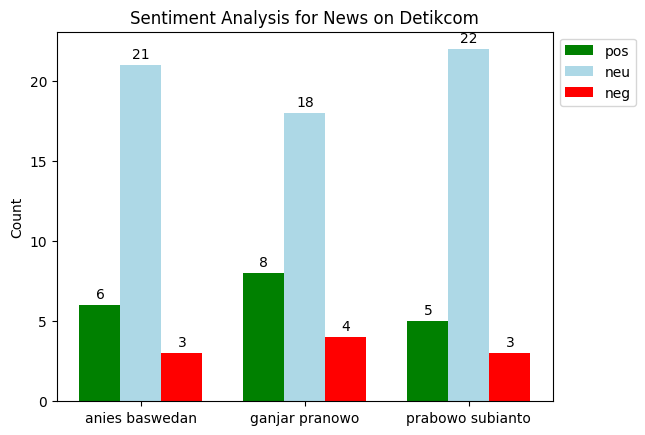

In [26]:
data_viz(df_all)

WordCloud

In [ ]:
# memulai dengan import library yg dibutuhkan
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
# membuat stopword list
stopwords = {'di','ke','untuk','dari','dan','ini','itu','juga','saat'}

In [ ]:
def wc(df, img_path):
    img_path = PARENT_DIR/img_path
    text = " ".join([i for i in df.title])
    print("There are {} words from news title with keyword {}.".format(len(text),df.loc[0, 'keyword']))

    mask = np.array(Image.open(img_path))
    # mendapatkan gambar wordcloud
    wordcloud_por = WordCloud(stopwords=stopwords, background_color='white', max_words=50000, mask=mask).generate(text)
    #membuat warna dari gambar
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(PARENT_DIR/f'save_img/{df.loc[0,"keyword"]}.jpg')
    plt.show

In [ ]:
wc(df_anies, img_path='img/anies.jpg')

In [ ]:
wc(df_prabowo, img_path='img/prabowo.jpg')

In [ ]:
wc(df_ganjar, img_path='img/ganjar.jpg')